Encoding Problems:
- __Figure 2B IFG gpt2 vs glove__
  - Green interaction isn't the same as paper (described as one-sided, while every other interaction sig test was done two-sided, so I replicated with two-sided for the data)
- __Figure 2C Precentral__ (Redid the plot)
  - All six lines not the same (between figure and the data provided)
- Figure S4
  - Green interaction doesn't have FDR (both for the figure and the data provided)
- __Figure S5__ (Redid the plot)
  - For both glove and gpt2, couldn't find the matching results for the pink and the black line even though the blue line seems to be the not aligned version (so I provided data correctly, but not the same as plot)
- Figure S6
  - For glove, the desription says concat 10 words, but was actually 20 (both for the figure and the data provided)
- __Figure S7__ (Redid the plot)
  - Can't replicate the orange interactions


Decoding Problems:
- Figure 3
  - Results are by fold (10) and repetition for ensemble (5)
  - Each lag has 50 values, seaborn plots the mean and confidence interval
- Figure S8
- Figure S9
- Figure S10

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

from scipy.stats import ttest_ind
from statsmodels.stats import multitest


def fdr(pvals):
    _, pcor, _, _ = multitest.multipletests(pvals, method="fdr_bh", is_sorted=False)
    return pcor

In [2]:
data_dir = "../data/plotting/paper-0shot/data/"
result_dir = "../data/plotting/paper-0shot/results/"
lags = np.arange(-4000, 4025, 25)
lw = 4
alpha = 0.1
alpha = 0.15

def get_mode(df, mode):
    df_mode = df[df.type == mode]
    df_mode.drop(
        columns={"Unnamed: 0", "type", "threshold"},
        errors="ignore",
        inplace=True,
    )
    return df_mode

def save_mode(df_mode, fig, color):
    df_mode.columns = lags
    df_mode.to_csv(os.path.join(result_dir,f"{fig}-{color}.csv"),index=False)


def plot_mode(df_plot):
    means = df_plot.mean()
    sems = df_plot.sem()
    fig, ax = plt.subplots(1,1)
    ax.plot(
        lags,
        means,
        color="blue",
        lw=lw,
        label="0Shot",
    )
    ax.fill_between(lags, means - sems, means + sems, alpha=alpha, color="blue")
    ax.set_ylim(-0.05, 0.16)
    ax.set_xlim(-4000, 4000)

def plot_sig(df_sig):
    fig, ax = plt.subplots(1,1)
    ax.set_xlim(-4000, 4000)
    ax.set_ylim(-0.05, 0.16)
    yheight = ax.get_ylim()[1] - 0.005
    sigs = df_sig.iloc[0, :].to_numpy().nonzero()[0]
    print(sigs)
    ax.scatter(lags[sigs], [yheight] * len(sigs), marker="*", color="blue")

def plot_compare_sig(df_first, df_second):
    interactions = []
    for i in np.arange(df_first.shape[1]):
        p = ttest_ind(df_first.iloc[:, i], df_second.iloc[:, i], alternative="two-sided")[1]
        interactions.append(p)
    interactions = fdr(interactions)
    # interactions = np.array(interactions)
    interactions[interactions >= 0.01] = 0
    sigs = interactions.nonzero()[0]
    print(sigs)
    fig, ax = plt.subplots(1,1)
    ax.set_xlim(-4000, 4000)
    ax.set_ylim(-0.05, 0.16)
    yheight = ax.get_ylim()[1] - 0.005
    ax.scatter(
        lags[sigs],
        [yheight + 0.003] * len(sigs),
        marker="*",
        color="green",
    )
    return interactions

def plot_compare_sig2(df_first, df_second, df_actual, threshold):
    interactions = []
    for i in np.arange(df_first.shape[1]):
        p = ttest_ind(df_first.iloc[:, i], df_second.iloc[:, i], alternative="two-sided")[1]
        interactions.append(p)
    interactions = fdr(interactions)
    # interactions = np.array(interactions)
    interactions[interactions >= 0.01] = 0
    interactions[df_actual.mean(axis=0) < threshold] = 0
    sigs = interactions.nonzero()[0]
    print(sigs)
    fig, ax = plt.subplots(1,1)
    ax.set_xlim(-4000, 4000)
    ax.set_ylim(-0.05, 0.16)
    yheight = ax.get_ylim()[1] - 0.005
    ax.scatter(
        lags[sigs],
        [yheight + 0.003] * len(sigs),
        marker="*",
        color="green",
    )
    return interactions

### FIG 2

In [ ]:
# df = pd.read_csv(os.path.join(data_dir, "fig2", "717_NYU_class_IFG-n_41.csv"))
# df = pd.read_csv(os.path.join(data_dir, "fig2", "742_NYU_class_IFG-n_14.csv"))
# df = pd.read_csv(os.path.join(data_dir, "fig2", "798_NYU_class_IFG-n_26.csv"))
# df = pd.read_csv(os.path.join(data_dir, "fig2", "all3_NYU_class_IFG-n_81.csv"))
# df = pd.read_csv(os.path.join(data_dir, "fig2", "all3_NYU_class_IFG-n_81_glove.csv"))
# df = pd.read_csv(os.path.join(data_dir, "fig2", "all3_NYU_class_precentral-n_46.csv"))
# df = pd.read_csv(os.path.join(data_dir, "fig2", "all3_NYU_class_precentral-n_46_glove.csv"))
# df1 = pd.read_csv(os.path.join(data_dir, "fig2", "all3_NYU_class_IFG-n_81.csv"))
# df2 = pd.read_csv(os.path.join(data_dir, "fig2", "all3_NYU_class_IFG-n_81_glove.csv"))

# figname = "fig2-4"
# df_ac = get_mode(df, "actual")
# plot_mode(df_ac)
# save_mode(df_ac, figname, "blue")
# df_nn = get_mode(df, "near_neighbor")
# plot_mode(df_nn)
# save_mode(df_nn, figname, "red")
# df_nn = get_mode(df, "shuffle")
# plot_mode(df_nn)
# save_mode(df_nn, figname, "black")
# df_sig = get_mode(df, "is_significant")
# plot_sig(df_sig)
# save_mode(df_sig, figname, "sig")

# print(df.threshold.unique()[0])

# df1_ac = get_mode(df1, "actual")
# df1_nn = get_mode(df1, "near_neighbor")
# df2_ac = get_mode(df2, "actual")
# df2_nn = get_mode(df2, "near_neighbor")
# df1_plt = df1_ac.reset_index(drop=True) - df1_nn.reset_index(drop=True)
# df2_plt = df2_ac.reset_index(drop=True) - df2_nn.reset_index(drop=True)

# interact_sigs = plot_compare_sig(df1_plt, df2_plt)
# interact_sigs[interact_sigs > 0] = 1
# df_int = pd.DataFrame([interact_sigs])
# save_mode(df_int, figname, "sig2")

### FIG 3

Google's Data: for ifg and ifg shuffle lines

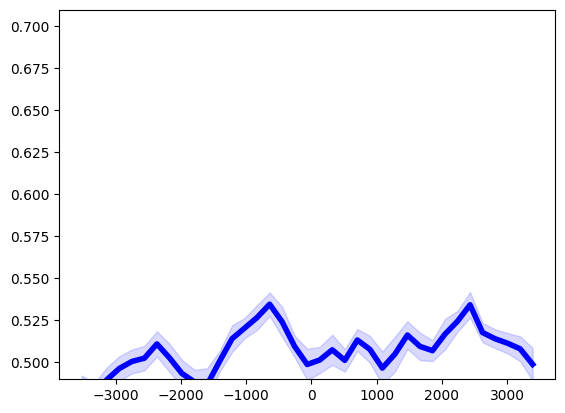

In [8]:
de_lags = np.arange(-3520, 3393, 192)
df = pd.read_csv(os.path.join(data_dir, "fig3", "717_ifg.csv"))
filename = "fig3-1-ifg.csv"
df = pd.read_csv(os.path.join(data_dir, "fig3", "717_ifg_shuffle.csv"))
filename = "fig3-1-ifg-sh.csv"
df = pd.read_csv(os.path.join(data_dir, "fig3", "742_ifg.csv"))
filename = "fig3-2-ifg.csv"
df = pd.read_csv(os.path.join(data_dir, "fig3", "742_ifg_shuffle.csv"))
filename = "fig3-2-ifg-sh.csv"
df = pd.read_csv(os.path.join(data_dir, "fig3", "798_ifg.csv"))
filename = "fig3-3-ifg.csv"
df = pd.read_csv(os.path.join(data_dir, "fig3", "798_ifg_shuffle.csv"))
filename = "fig3-3-ifg-sh.csv"
df = pd.read_csv(os.path.join(data_dir, "fig3", "all_ifg.csv"))
filename = "fig3-4-ifg.csv"
df = pd.read_csv(os.path.join(data_dir, "fig3", "all_ifg_shuffle.csv"))
filename = "fig3-4-ifg-sh.csv"
df = pd.read_csv(os.path.join(data_dir, "fig3", "717_pre.csv"))
filename = "fig3-1-pre.csv"
df = pd.read_csv(os.path.join(data_dir, "fig3", "717_pre_shuffle.csv"))
filename = "fig3-1-pre-sh.csv"
df = pd.read_csv(os.path.join(data_dir, "fig3", "742_pre.csv"))
filename = "fig3-2-pre.csv"
df = pd.read_csv(os.path.join(data_dir, "fig3", "742_pre_shuffle.csv"))
filename = "fig3-2-pre-sh.csv"
df = pd.read_csv(os.path.join(data_dir, "fig3", "798_pre.csv"))
filename = "fig3-3-pre.csv"
df = pd.read_csv(os.path.join(data_dir, "fig3", "798_pre_shuffle.csv"))
filename = "fig3-3-pre-sh.csv"
df = pd.read_csv(os.path.join(data_dir, "fig3", "all_pre.csv"))
filename = "fig3-4-pre.csv"
df = pd.read_csv(os.path.join(data_dir, "fig3", "all_pre_shuffle.csv"))
filename = "fig3-4-pre-sh.csv"
df2 = pd.read_csv(os.path.join(data_dir, "fig3", "all_ifg_shuffle.csv"))
df["lag"] = df2.lag

def reformat_decoding(df, lag = de_lags):
    df_new = pd.DataFrame()
    for lag in sorted(df.lag.unique()):
        df_lag = df[df.lag == lag].copy()
        df_new[lag] = df_lag.score.reset_index(drop=True)
    return df_new

df = df.loc[:,"score"].groupby([df.fold, df.lag]).mean().reset_index()
df_new = reformat_decoding(df)

means = df_new.mean(axis=0)
sems = df_new.sem(axis=0)
fig, ax = plt.subplots(1,1)
ax.plot(
    de_lags,
    means,
    color="blue",
    lw=lw,
    # label="0Shot",s
)
ax.fill_between(de_lags, means - sems, means + sems, alpha=alpha, color="blue")
ax.set_ylim(0.49,0.71)
df_new.to_csv(os.path.join(result_dir, filename),index=False)

Princeton Data: for 6 repetitions of pre and pre shuffle lines

In [ ]:
de_lags = np.arange(-3520, 3393, 192)
de_dir = "/scratch/gpfs/kw1166/0shot-decoding/results"
model = "s-717-PRE_e-160_t-regress_m-comp_e-gpt2xl_p-0shot_mwf-0-aligned"
filename = "fig3-1-pre.csv"
model = "s-717-PRE_e-160_t-regress_m-comp_e-gpt2xl_p-0shot_mwf-0-aligned-sh"
filename = "fig3-1-pre-sh.csv"
model = "s-742-PRE_e-160_t-regress_m-comp_e-gpt2xl_p-0shot_mwf-0-aligned"
filename = "fig3-2-pre.csv"
model = "s-742-PRE_e-160_t-regress_m-comp_e-gpt2xl_p-0shot_mwf-0-aligned-sh"
filename = "fig3-2-pre-sh.csv"
model = "s-798-PRE_e-160_t-regress_m-comp_e-gpt2xl_p-0shot_mwf-0-aligned"
filename = "fig3-3-pre.csv"
model = "s-798-PRE_e-160_t-regress_m-comp_e-gpt2xl_p-0shot_mwf-0-aligned-sh"
filename = "fig3-3-pre-sh.csv"
model = "s-all3-PRE_e-160_t-regress_m-comp_e-gpt2xl_p-0shot_mwf-0-aligned"
filename = "fig3-4-pre.csv"
model = "s-all3-PRE_e-160_t-regress_m-comp_e-gpt2xl_p-0shot_mwf-0-aligned-sh"
filename = "fig3-4-pre-sh.csv"

df_new = pd.DataFrame()
for lag in de_lags:
    lag_folder = os.path.join(
        de_dir, model, str(lag)
    )
    csv_1 = os.path.join(
        lag_folder, "ensemble", "avg_test_topk_rocaauc_df.csv"
    )
    result = pd.read_csv(csv_1)
    rocauc = result.groupby(result.fold).rocauc.mean().tolist()
    df_new[lag] = rocauc
means = df_new.mean(axis=0)
sems = df_new.sem(axis=0)
fig, ax = plt.subplots(1,1)
ax.plot(
    de_lags,
    means,
    color="blue",
    lw=lw,
    # label="0Shot",
)
ax.fill_between(de_lags, means - sems, means + sems, alpha=alpha, color="blue")
ax.set_ylim(0.49,0.71)
df_new.to_csv(os.path.join(result_dir, filename),index=False)

In [ ]:
#### Extra plotting for decoding
# de_lags = np.arange(-3520, 3393, 192)
de_lags = np.arange(-4000, 4001, 100)

fig_name = "sfig9"
fig_num = "-4"
df1 = os.path.join(result_dir, fig_name, f"{fig_name}{fig_num}-ifg.csv")
df2 = os.path.join(result_dir, fig_name, f"{fig_name}{fig_num}-pre.csv")
df3 = os.path.join(result_dir, fig_name, f"{fig_name}{fig_num}-ifg-sh.csv")
df4 = os.path.join(result_dir, fig_name, f"{fig_name}{fig_num}-pre-sh.csv")
# df5 = os.path.join(result_dir, fig_name, f"{fig_name}{fig_num}-blue.csv")
# df6 = os.path.join(result_dir, fig_name, f"{fig_name}{fig_num}-purple.csv")

df1 = pd.read_csv(df1)
df2 = pd.read_csv(df2)
df3 = pd.read_csv(df3)
df4 = pd.read_csv(df4)
# df5 = pd.read_csv(df5)
# df6 = pd.read_csv(df6)
fig, ax = plt.subplots(1,1)

def plot_df(ax, df, color):
    means = df.mean()
    sems = df.sem()
    ax.plot(
        de_lags,
        means,
        color=color,
        lw=2,
        # label="0Shot",
    )
    ax.fill_between(de_lags, means - sems, means + sems, alpha=alpha, color=color)
    return ax
ax = plot_df(ax, df1, "darkviolet")
ax = plot_df(ax, df2, "limegreen")
ax = plot_df(ax, df3, "black")
ax = plot_df(ax, df4, "black")
# ax = plot_df(ax, df5, "cyan")
# ax = plot_df(ax, df6, "darkviolet")
ax.set_ylim(0.45,0.71)
plt.savefig(f"../{fig_name}{fig_num}.jpeg")

### SFIG 1

In [ ]:
# df = pd.read_csv(os.path.join(data_dir, "sfig1", "717_NYU_class_precentral-n_8.csv"))
# df = pd.read_csv(os.path.join(data_dir, "sfig1", "742_NYU_class_precentral-n_20.csv"))
# df = pd.read_csv(os.path.join(data_dir, "sfig1", "798_NYU_class_precentral-n_18.csv"))

# figname = "sfig1-2"
# df_ac = get_mode(df, "actual")
# plot_mode(df_ac)
# save_mode(df_ac, figname, "blue")
# df_nn = get_mode(df, "near_neighbor")
# plot_mode(df_nn)
# save_mode(df_nn, figname, "red")
# df_nn = get_mode(df, "shuffle")
# plot_mode(df_nn)
# save_mode(df_nn, figname, "black")
# df_sig = get_mode(df, "is_significant")
# plot_sig(df_sig)
# save_mode(df_sig, figname, "sig")

# print(df.threshold.unique()[0])

### SFIG 2

In [ ]:
# df = pd.read_csv(os.path.join(data_dir, "sfig2", "717_NYU_class_prepos2-n_23.csv"))
# df = pd.read_csv(os.path.join(data_dir, "sfig2", "742_NYU_class_prepos2-n_46.csv"))
# df = pd.read_csv(os.path.join(data_dir, "sfig2", "798_NYU_class_prepos2-n_39.csv"))
# df = pd.read_csv(os.path.join(data_dir, "sfig2", "all3_NYU_class_prepos2-n_108.csv"))

# figname = "sfig2-4"
# df_ac = get_mode(df, "actual")
# plot_mode(df_ac)
# save_mode(df_ac, figname, "blue")
# df_nn = get_mode(df, "near_neighbor")
# plot_mode(df_nn)
# save_mode(df_nn, figname, "red")
# df_nn = get_mode(df, "shuffle")
# plot_mode(df_nn)
# save_mode(df_nn, figname, "black")
# df_sig = get_mode(df, "is_significant")
# plot_sig(df_sig)
# save_mode(df_sig, figname, "sig")

# print(df.threshold.unique()[0])

### SFIG 3

In [ ]:
# df = pd.read_csv(os.path.join(data_dir, "sfig3", "0shot-dat-d-2-717_NYU_class_IFG-n_41.csv"))
# df = pd.read_csv(os.path.join(data_dir, "sfig3", "0shot-dat-d-2-742_NYU_class_IFG-n_14.csv"))
# df = pd.read_csv(os.path.join(data_dir, "sfig3", "0shot-dat-d-2-798_NYU_class_IFG-n_26.csv"))
# df = pd.read_csv(os.path.join(data_dir, "sfig3", "0shot-dat-d-2-all3_NYU_class_IFG-n_81.csv"))
# df = pd.read_csv(os.path.join(data_dir, "sfig3", "0shot-dat-ned-all3_NYU_class_IFG-n_81.csv"))
# df = pd.read_csv(os.path.join(data_dir, "sfig3", "0shot-dat-d-2-all3_NYU_class_precentral-n_46.csv"))
# df = pd.read_csv(os.path.join(data_dir, "sfig3", "0shot-dat-ned-all3_NYU_class_precentral-n_46.csv"))
# df1 = pd.read_csv(os.path.join(data_dir, "sfig3", "0shot-dat-d-2-all3_NYU_class_IFG-n_81.csv"))
# df2 = pd.read_csv(os.path.join(data_dir, "sfig3", "0shot-dat-ned-all3_NYU_class_IFG-n_81.csv"))

# figname = "sfig3-4"
# df_ac = get_mode(df, "actual")
# plot_mode(df_ac)
# save_mode(df_ac, figname, "blue")
# df_nn = get_mode(df, "near_neighbor")
# plot_mode(df_nn)
# save_mode(df_nn, figname, "red")
# df_nn = get_mode(df, "shuffle")
# plot_mode(df_nn)
# save_mode(df_nn, figname, "black")
# df_sig = get_mode(df1, "is_significant")
# plot_sig(df_sig)
# save_mode(df_sig, figname, "sig")

# print(df.threshold.unique()[0])

# df1_ac = get_mode(df1, "actual")
# df1_nn = get_mode(df1, "near_neighbor")
# df2_ac = get_mode(df2, "actual")
# df2_nn = get_mode(df2, "near_neighbor")
# df1_plt = df1_ac.reset_index(drop=True) - df1_nn.reset_index(drop=True)
# df2_plt = df2_ac.reset_index(drop=True) - df2_nn.reset_index(drop=True)
# interact_sigs = plot_compare_sig(df1_plt, df2_plt)
# interact_sigs[interact_sigs > 0] = 1
# df_int = pd.DataFrame([interact_sigs])
# save_mode(df_int, figname, "sig2")

### SFIG 4

In [ ]:
# df = pd.read_csv(os.path.join(data_dir, "sfig4", "0shot-dat-emb-all3_NYU_class_IFG-n_81_fold.csv"))
# df1 = pd.read_csv(os.path.join(data_dir, "sfig4", "0shot-dat-emb-all3_NYU_class_IFG-n_81_fold.csv"))
# df2 = pd.read_csv(os.path.join(data_dir, "sfig3", "0shot-dat-ned-all3_NYU_class_IFG-n_81.csv"))

# figname = "sfig4-2"
# df_ac = get_mode(df, "actual")
# plot_mode(df_ac)
# save_mode(df_ac, figname, "blue")
# df_nn = get_mode(df, "near_neighbor")
# plot_mode(df_nn)
# save_mode(df_nn, figname, "red")
# df_nn = get_mode(df, "shuffle")
# plot_mode(df_nn)
# save_mode(df_nn, figname, "black")
# df_sig = get_mode(df, "is_significant")
# plot_sig(df_sig)
# save_mode(df_sig, figname, "sig")

# print(df.threshold.unique()[0])

# df1_ac = get_mode(df1, "actual")
# df1_nn = get_mode(df1, "near_neighbor")
# df2_ac = get_mode(df2, "actual")
# df2_nn = get_mode(df2, "near_neighbor")
# df1_plt = df1_ac.reset_index(drop=True) - df1_nn.reset_index(drop=True)
# df2_plt = df2_ac.reset_index(drop=True) - df2_nn.reset_index(drop=True)
# interact_sigs = plot_compare_sig(df1_plt, df2_plt)
# interact_sigs[interact_sigs > 0] = 1
# df_int = pd.DataFrame([interact_sigs])
# save_mode(df_int, figname, "sig2")

### SFIG 5

In [ ]:
# Not used
# e50: glove-nnt from figures-2nd-old (seems to fit the black line)
# old: gpt2-fold-nnt from figures-2nd-old (seems to fit the black line)
# ned: gpt2-aligned-nnt from figures-2nd

# df = pd.read_csv(os.path.join(data_dir, "sfig5", "0shot-dat-e50-all3_NYU_class_IFG-n_81.csv"))
# df = pd.read_csv(os.path.join(data_dir, "sfig5", "0shot-dat-old-all3_NYU_class_IFG-n_81.csv"))
# df = pd.read_csv(os.path.join(data_dir, "sfig5", "0shot-dat-ned-all3_NYU_class_IFG-n_81.csv"))

# Used (Should be the correct version)
# ned from sfig3: glove-aligned-nnt
# d-2: gpt2-fold-aligned-nnt from figures-2nd

# df = pd.read_csv(os.path.join(data_dir, "sfig3", "0shot-dat-ned-all3_NYU_class_IFG-n_81.csv"))
# df = pd.read_csv(os.path.join(data_dir, "sfig5", "0shot-dat-d-2-all3_NYU_class_IFG-n_81.csv"))
# df1 = pd.read_csv(os.path.join(data_dir, "sfig3", "0shot-dat-ned-all3_NYU_class_IFG-n_81.csv"))
# df2 = pd.read_csv(os.path.join(data_dir, "sfig5", "0shot-dat-d-2-all3_NYU_class_IFG-n_81.csv"))

# figname = "sfig5-1"
# df_ac = get_mode(df, "actual")
# plot_mode(df_ac)
# save_mode(df_ac, figname, "blue")
# df_nn = get_mode(df, "near_neighbor_test")
# plot_mode(df_nn)
# save_mode(df_nn, figname, "pink")
# df_sh = get_mode(df, "shuffle")
# plot_mode(df_sh)
# save_mode(df_sh, figname, "black")
# df_sig = get_mode(df, "is_significant_test")
# plot_sig(df_sig)
# save_mode(df_sig, figname, "sig")

# print(df.threshold.unique()[0])

# df1_ac = get_mode(df1, "actual")
# df1_nn = get_mode(df1, "near_neighbor_test")
# df2_ac = get_mode(df2, "actual")
# df2_nn = get_mode(df2, "near_neighbor_test")
# df1_plt = df1_ac.reset_index(drop=True) - df1_nn.reset_index(drop=True)
# df2_plt = df2_ac.reset_index(drop=True) - df2_nn.reset_index(drop=True)
# interact_sigs = plot_compare_sig2(df1_plt, df2_plt, df2_ac, df1.threshold.unique()[0])
# interact_sigs[interact_sigs > 0] = 1
# df_int = pd.DataFrame([interact_sigs])
# save_mode(df_int, figname, "sig2")
# df1_ac.mean(axis=0) < df1.threshold.unique()[0]


In [ ]:
df_sig.sum(axis=1)

### SFIG 6

In [ ]:
# 0-6: glove-concat10 from figures-2nd
# t10: glove-concat from figures-2nd-old
# 5-6: glove-concat5 from figures-2nd-old
# 0-7: glove-concat20 from figures-2nd-old

# df = pd.read_csv(os.path.join(data_dir, "sfig6", "0shot-dat-0-6-all3_NYU_class_IFG-n_81.csv"))
# df = pd.read_csv(os.path.join(data_dir, "sfig6", "0shot-dat-t10-all3_NYU_class_IFG-n_81.csv"))
# df = pd.read_csv(os.path.join(data_dir, "sfig6", "0shot-dat-5-6-all3_NYU_class_IFG-n_81.csv"))

# df = pd.read_csv(os.path.join(data_dir, "sfig6", "0shot-dat-0-7-all3_NYU_class_IFG-n_81.csv"))
# df1 = pd.read_csv(os.path.join(data_dir, "sfig6", "0shot-dat-0-7-all3_NYU_class_IFG-n_81.csv"))
# df2 = pd.read_csv(os.path.join(data_dir, "sfig5", "0shot-dat-d-2-all3_NYU_class_IFG-n_81.csv"))

# figname = "sfig6-1"
# df_ac = get_mode(df, "actual")
# plot_mode(df_ac)
# save_mode(df_ac, figname, "blue")
# df_nn = get_mode(df, "near_neighbor")
# plot_mode(df_nn)
# save_mode(df_nn, figname, "red")
# df_nn = get_mode(df, "shuffle")
# plot_mode(df_nn)
# save_mode(df_nn, figname, "black")
# df_sig = get_mode(df, "is_significant")
# plot_sig(df_sig)
# save_mode(df_sig, figname, "sig")

# print(df2.threshold.unique()[0])

# df1_ac = get_mode(df1, "actual")
# df1_nn = get_mode(df1, "near_neighbor")
# df2_ac = get_mode(df2, "actual")
# df2_nn = get_mode(df2, "near_neighbor")
# df1_plt = df1_ac.reset_index(drop=True) - df1_nn.reset_index(drop=True)
# df2_plt = df2_ac.reset_index(drop=True) - df2_nn.reset_index(drop=True)
# interact_sigs = plot_compare_sig(df1_plt, df2_plt)
# interact_sigs[interact_sigs > 0] = 1
# df_int = pd.DataFrame([interact_sigs])
# save_mode(df_int, figname, "sig2")

### SFIG 7

In [ ]:


# df = pd.read_csv(os.path.join(data_dir, "sfig7", "0shot-dat-c-9-all3_NYU_class_IFG-n_81.csv"))
# df = pd.read_csv(os.path.join(data_dir, "sfig7", "0shot-dat-at3-all3_NYU_class_IFG-n_81.csv"))

df1 = pd.read_csv(os.path.join(data_dir, "sfig7", "0shot-dat-c-9-all3_NYU_class_IFG-n_81.csv"))
df2 = pd.read_csv(os.path.join(data_dir, "sfig7", "0shot-dat-at3-all3_NYU_class_IFG-n_81.csv"))
# df1 = pd.read_csv(os.path.join(data_dir, "sfig7", "0shot-dat-at3-all3_NYU_class_IFG-n_81.csv"))
# df2 = pd.read_csv(os.path.join(data_dir, "sfig3", "0shot-dat-d-2-all3_NYU_class_IFG-n_81.csv"))

figname = "sfig7-B"
# df_ac = get_mode(df, "actual")
# plot_mode(df_ac)
# save_mode(df_ac, figname, "blue")
# df_nn = get_mode(df, "near_neighbor")
# plot_mode(df_nn)
# save_mode(df_nn, figname, "red")
# df_nn = get_mode(df, "shuffle")
# plot_mode(df_nn)
# save_mode(df_nn, figname, "black")
# df_sig = get_mode(df, "is_significant")
# plot_sig(df_sig)
# save_mode(df_sig, figname, "sig")

# print(df.threshold.unique()[0])

df1_ac = get_mode(df1, "actual")
df2_ac = get_mode(df2, "actual")
interact_sigs = plot_compare_sig2(df2_ac, df1_ac, df2_ac, df2.threshold.unique()[0])
interact_sigs[interact_sigs > 0] = 1
df_int = pd.DataFrame([interact_sigs])
save_mode(df_int, figname, "sig2")

### SFIG 8

In [ ]:
de_lags = np.arange(-4000, 4001, 100)
# de_lags = np.arange(-4000, 4100, 100)
de_dir = "/home/kw1166/tigress/2022.0shot/0shot-decoding-results/0shot-decoding-lr"
model = "s-all3-IFG_e-160_t-regress_m-comp_e-gpt2xl_p-0shot_mwf-0-linReg"
filename = "s8-ifg.csv"
model = "s-all3-IFG_e-160_t-regress_m-comp_e-gpt2xl_p-0shot_mwf-0-linReg-sh"
filename = "s8-ifg-sh.csv"
model = "s-all3-PRE_e-160_t-regress_m-comp_e-gpt2xl_p-0shot_mwf-0-linReg"
filename = "s8-pre.csv"
model = "s-all3-PRE_e-160_t-regress_m-comp_e-gpt2xl_p-0shot_mwf-0-linReg-sh"
filename = "s8-pre-sh.csv"


df_new = pd.DataFrame()
for lag in de_lags:
    lag_folder = os.path.join(
        de_dir, model, str(lag)
    )
    csv_1 = os.path.join(
        lag_folder, "ensemble", "avg_test_topk_rocaauc_df.csv"
    )
    result = pd.read_csv(csv_1)
    results = result.groupby(result.fold).rocauc.mean().tolist()
    # results = result.rocauc
    df_new[lag] = results

means = df_new.mean(axis=0)
sems = df_new.sem(axis=0)
fig, ax = plt.subplots(1,1)
ax.plot(
    de_lags,
    means,
    color="blue",
    lw=lw,
    # label="0Shot",
)
ax.fill_between(de_lags, means - sems, means + sems, alpha=alpha, color="blue")
ax.set_ylim(0.44,0.71)
df_new.to_csv(os.path.join(result_dir, filename),index=False)

### SFIG 9

In [ ]:
de_lags = np.arange(-4000, 4100, 100)
de_dir = "/home/kw1166/tigress/2022.0shot/0shot-decoding-results/0shot-decoding-mia"
# model = "s-717-IFG_e-160_t-regress_m-comp_e-gpt2xl_p-0shot_mwf-03"
# filename = "s9-1-ifg.csv"
# model = "s-717-IFG_e-160_t-regress_m-comp_e-gpt2xl_p-0shot_mwf-03-sh"
# filename = "s9-1-ifg-sh.csv"
# model = "s-717-PRE_e-160_t-regress_m-comp_e-gpt2xl_p-0shot_mwf-03"
# filename = "s9-1-pre.csv"
# model = "s-717-PRE_e-160_t-regress_m-comp_e-gpt2xl_p-0shot_mwf-03-sh"
# filename = "s9-1-pre-sh.csv"
# model = "s-742-IFG_e-160_t-regress_m-comp_e-gpt2xl_p-0shot_mwf-03"
# filename = "s9-2-ifg.csv"
# model = "s-742-IFG_e-160_t-regress_m-comp_e-gpt2xl_p-0shot_mwf-03-sh"
# filename = "s9-2-ifg-sh.csv"
# model = "s-742-PRE_e-160_t-regress_m-comp_e-gpt2xl_p-0shot_mwf-03"
# filename = "s9-2-pre.csv"
# model = "s-742-PRE_e-160_t-regress_m-comp_e-gpt2xl_p-0shot_mwf-03-sh"
# filename = "s9-2-pre-sh.csv"
# model = "s-798-IFG_e-160_t-regress_m-comp_e-gpt2xl_p-0shot_mwf-03"
# filename = "s9-3-ifg.csv"
# model = "s-798-IFG_e-160_t-regress_m-comp_e-gpt2xl_p-0shot_mwf-03-sh"
# filename = "s9-3-ifg-sh.csv"
# model = "s-798-PRE_e-160_t-regress_m-comp_e-gpt2xl_p-0shot_mwf-03"
# filename = "s9-3-pre.csv"
# model = "s-798-PRE_e-160_t-regress_m-comp_e-gpt2xl_p-0shot_mwf-03-sh"
# filename = "s9-3-pre-sh.csv"
# model = "s-all3-IFG_e-160_t-regress_m-comp_e-gpt2xl_p-0shot_mwf-03"
# filename = "s9-4-ifg.csv"
# model = "s-all3-IFG_e-160_t-regress_m-comp_e-gpt2xl_p-0shot_mwf-03-sh"
# filename = "s9-4-ifg-sh.csv"
# model = "s-all3-PRE_e-160_t-regress_m-comp_e-gpt2xl_p-0shot_mwf-03"
# filename = "s9-4-pre.csv"
# model = "s-all3-PRE_e-160_t-regress_m-comp_e-gpt2xl_p-0shot_mwf-03-sh"
# filename = "s9-4-pre-sh.csv"

df_new = pd.DataFrame()
for lag in de_lags:
    lag_folder = os.path.join(
        de_dir, model, str(lag)
    )
    csv_1 = os.path.join(
        lag_folder, "ensemble", "avg_test_topk_rocaauc_df.csv"
    )
    result = pd.read_csv(csv_1)
    results = result.groupby(result.fold).rocauc.mean().tolist()
    df_new[lag] = results

means = df_new.mean(axis=0)
sems = df_new.sem(axis=0)
fig, ax = plt.subplots(1,1)
ax.plot(
    de_lags,
    means,
    color="blue",
    lw=lw,
    # label="0Shot",
)
ax.fill_between(de_lags, means - sems, means + sems, alpha=alpha, color="blue")
ax.set_ylim(0.44,0.71)
df_new.to_csv(os.path.join(result_dir, filename),index=False)

### SFIG 10

In [ ]:
de_lags = np.arange(-4000, 4100, 100)
de_dir = "/home/kw1166/tigress/2022.0shot/0shot-decoding-results/0shot-decoding-aligned-2"
model = "s-717-IFG_e-160_t-regress_m-comp_e-glove50_p-0shot_mwf-0-aligned"
filename = "s10-1-blue.csv"
model = "s-717-IFG_e-160_t-regress_m-comp_e-gpt2xl_p-0shot_mwf-0-aligned"
filename = "s10-1-purple.csv"
model = "s-742-IFG_e-160_t-regress_m-comp_e-glove50_p-0shot_mwf-0-aligned"
filename = "s10-2-blue.csv"
model = "s-742-IFG_e-160_t-regress_m-comp_e-gpt2xl_p-0shot_mwf-0-aligned"
filename = "s10-2-purple.csv"
model = "s-798-IFG_e-160_t-regress_m-comp_e-glove50_p-0shot_mwf-0-aligned"
filename = "s10-3-blue.csv"
model = "s-798-IFG_e-160_t-regress_m-comp_e-gpt2xl_p-0shot_mwf-0-aligned"
filename = "s10-3-purple.csv"
model = "s-all3-IFG_e-160_t-regress_m-comp_e-glove50_p-0shot_mwf-0-aligned"
filename = "s10-4-blue.csv"
model = "s-all3-IFG_e-160_t-regress_m-comp_e-gpt2xl_p-0shot_mwf-0-aligned"
filename = "s10-4-purple.csv"


df_new = pd.DataFrame()
for lag in de_lags:
    lag_folder = os.path.join(
        de_dir, model, str(lag)
    )
    csv_1 = os.path.join(
        lag_folder, "ensemble", "avg_test_topk_rocaauc_df.csv"
    )
    result = pd.read_csv(csv_1)
    results = result.groupby(result.fold).rocauc.mean().tolist()
    df_new[lag] = results

means = df_new.mean(axis=0)
sems = df_new.sem(axis=0)
fig, ax = plt.subplots(1,1)
ax.plot(
    de_lags,
    means,
    color="blue",
    lw=lw,
    # label="0Shot",
)
ax.fill_between(de_lags, means - sems, means + sems, alpha=alpha, color="blue")
ax.set_ylim(0.44,0.71)
df_new.to_csv(os.path.join(result_dir, filename),index=False)